In [1]:
# 1. Loading and normalizing CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

trainloader = torch.utils.data.DataLoader(
    dataset=trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

Files already downloaded and verified


In [3]:
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,  # test data
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    dataset=testset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

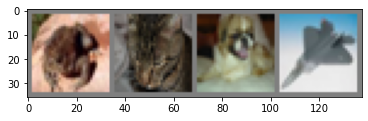

 frog   cat   dog plane


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize -> ??
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [21]:
images.shape

torch.Size([4, 3, 32, 32])

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # input: (3, 32, 32)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [33]:
_input = torch.Tensor(1, 3, 32, 32)

In [36]:
conv1 = nn.Conv2d(3, 5, 5)
pool = nn.MaxPool2d(2)

In [37]:
out = conv1(_input)

In [42]:
out.shape/

torch.Size([1, 5, 28, 28])

In [43]:
out2 = pool(out)

In [44]:
out2.shape

torch.Size([1, 5, 14, 14])

In [23]:
conv1 = nn.Conv2d(3, 6, 5)

In [27]:
conv1(images).shape

torch.Size([4, 6, 28, 28])

In [46]:
nn.Linear?

Init signature: nn.Linear(in_features:int, out_features:int, bias:bool=True) -> None
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(N, *, H_{in})` where :math:`*` means any number of
      additional dimensions and :math:`H_{in} = \text{in\_features}`
    - Output: :math:`(N, *, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :math:`(\text{out\_features}, \text{in\_features})`. The values are
        initialized from :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})`, where
        :math:`k = \frac{1}{\text{in\_features}}`
    bias:   the learnable bias of the module of shape :mat

In [7]:
# 3. Define a loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
# 4. Train the network

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')
        

[1,  2000] loss: 2.192
[1,  4000] loss: 1.850
[1,  6000] loss: 1.662
[1,  8000] loss: 1.557
[1, 10000] loss: 1.493
[1, 12000] loss: 1.454
[2,  2000] loss: 1.366
[2,  4000] loss: 1.375
[2,  6000] loss: 1.340
[2,  8000] loss: 1.315
[2, 10000] loss: 1.285
[2, 12000] loss: 1.252
Finished Training


In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

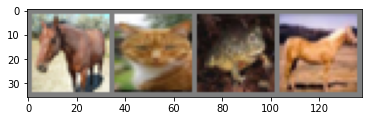

GroundTruth:  horse   cat  frog horse


In [10]:
# 5. Test the network on the test data
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)


print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse  deer  frog horse


In [16]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 58 %
Accuracy of  bird : 29 %
Accuracy of   cat : 28 %
Accuracy of  deer : 54 %
Accuracy of   dog : 39 %
Accuracy of  frog : 75 %
Accuracy of horse : 54 %
Accuracy of  ship : 78 %
Accuracy of truck : 63 %
